# Study the different embeddings of the trained transformer

### Start by loading the model 

In [1]:
# Add the relevant path for the root directory
import sys, os
sys.path.insert(0, "/Users/aurelien/PycharmProjects/spinorhelicity/")

In [2]:
from environment.utils import AttrDict
from environment import build_env
from model import build_modules

from environment.utils import to_cuda

In [3]:
# Define the trained model that we want to probed
model_path = '../experiments/npt6/checkpoint.pth'
file_tag = 'without_IDs'
assert os.path.isfile(model_path)

In [4]:
params = params = AttrDict({

'exp_name': 'Test_data_spin_hel',
        'dump_path': '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/',
        'exp_id': 'test',
        'save_periodic': 0,
        'tasks': 'spin_hel',

        # environment parameters
        'env_name': 'char_env',
        'max_npt': 6,
        'max_scale': 2,
        'max_terms': 1,
        'max_scrambles': 5,
        'save_info_scr': False,
        'int_base': 10,
        'max_len': 2048,
        'canonical_form': True,
        'bracket_tokens': True,
        'generator_id': 2,
        'l_scale': 0.75,
        'numerical_check': False,

        # model parameters
        'emb_dim': 512,
        'n_enc_layers': 3,
        'n_dec_layers': 3,
        'n_heads': 8,
        'dropout': 0,
        'attention_dropout': 0,
        'sinusoidal_embeddings': False,
        'share_inout_emb': True,
        'reload_model': model_path,

        'amp': -1,
        'fp16': False,

        # CPU param
        'cpu': True,

})

In [5]:
env = build_env(params)
modules = build_modules(env, params)
encoder = modules['encoder']
decoder = modules['decoder']
encoder.eval()
decoder.eval()

TransformerModel(
  (position_embeddings): Embedding(2560, 512)
  (embeddings): Embedding(98, 512, padding_idx=1)
  (layer_norm_emb): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
  (attentions): ModuleList(
    (0): MultiHeadAttention(
      (q_lin): Linear(in_features=512, out_features=512, bias=True)
      (k_lin): Linear(in_features=512, out_features=512, bias=True)
      (v_lin): Linear(in_features=512, out_features=512, bias=True)
      (out_lin): Linear(in_features=512, out_features=512, bias=True)
    )
    (1): MultiHeadAttention(
      (q_lin): Linear(in_features=512, out_features=512, bias=True)
      (k_lin): Linear(in_features=512, out_features=512, bias=True)
      (v_lin): Linear(in_features=512, out_features=512, bias=True)
      (out_lin): Linear(in_features=512, out_features=512, bias=True)
    )
    (2): MultiHeadAttention(
      (q_lin): Linear(in_features=512, out_features=512, bias=True)
      (k_lin): Linear(in_features=512, out_features=512, bias=True)
 

In [6]:
import torch
import numpy as np

encoder.embeddings

Embedding(98, 512, padding_idx=1)

### Look at the embedding of the integers in the model

In [7]:
x1 = torch.LongTensor(
    [env.word2id[str(w)] for w in range(1,10)] 
).view(-1, 1).transpose(0, 1)

In [8]:
with torch.no_grad():
    tensor_integers = encoder.embeddings(x1)

##### Start with a simple PCA of the 512 embedding vectors

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_res2 = pca.fit_transform(tensor_integers.numpy()[0])
pca_res2

array([[ 2.5659003 ,  0.50932103],
       [ 1.4546379 , -0.01696889],
       [ 0.3175135 , -0.1388226 ],
       [-0.11575778, -1.3811883 ],
       [-0.53602433, -1.3617771 ],
       [-0.7467851 , -1.0555879 ],
       [-1.2675085 ,  0.3879577 ],
       [-1.0947356 ,  1.2750466 ],
       [-0.57724047,  1.7820183 ]], dtype=float32)

In [113]:
pca1 = PCA(n_components=1)
pca_res1 = pca1.fit_transform(tensor_integers.numpy()[0])
pca_res1

array([[ 2.5658996 ],
       [ 1.4546372 ],
       [ 0.3175148 ],
       [-0.11575562],
       [-0.53602207],
       [-0.74678457],
       [-1.2675083 ],
       [-1.0947376 ],
       [-0.5772422 ]], dtype=float32)

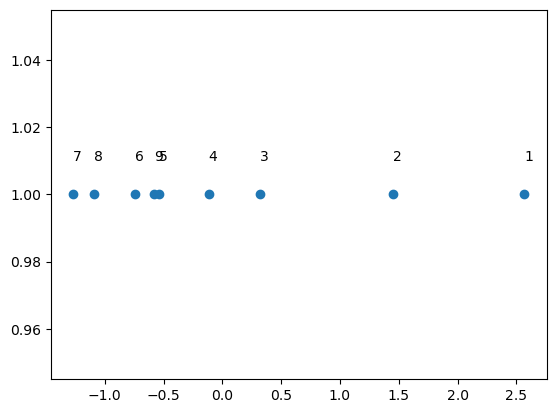

In [119]:
plt.scatter(pca_res1[:,0], pca_res1[:,0]/pca_res1[:,0])
  
# Loop for annotation of all points
for i in range(len(pca_res1[:,0])):
    plt.annotate(str(i+1), (pca_res1[i,0], 1 + 0.01))

#plt.xlim((-1.5, 3.0))
#plt.ylim((-1.5, 2.1))
    
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/integer_embed_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/integer_embed_{}.png'.format(file_tag), bbox_inches='tight')

plt.show()

In [10]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.24682163 0.19493793]
[0.24682163 0.44175956]


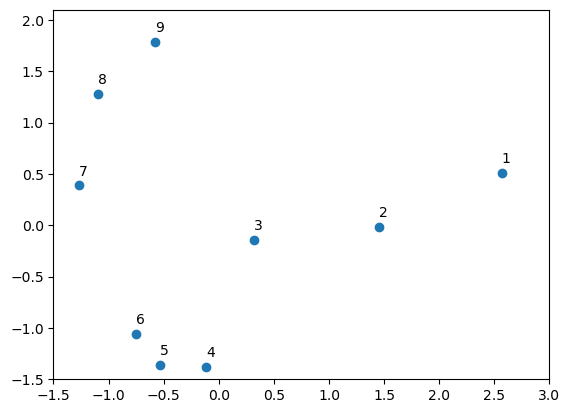

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.scatter(pca_res2[:,0], pca_res2[:,1])
  
# Loop for annotation of all points
for i in range(len(pca_res2[:,0])):
    plt.annotate(str(i+1), (pca_res2[i,0], pca_res2[i,1] + 0.1))

plt.xlim((-1.5, 3.0))
plt.ylim((-1.5, 2.1))
    
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/integer_embed_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/integer_embed_{}.png'.format(file_tag), bbox_inches='tight')

plt.show()


##### Now do a T-distributed Stochastic Neighbor Embedding

In [12]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3).fit_transform(tensor_integers.numpy()[0])
X_embedded

/Users/aurelien/miniforge3/envs/spinorhelicity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


array([[108.82419  , -28.71451  ],
       [ 93.75408  , -22.212864 ],
       [ 77.37098  , -19.550722 ],
       [ 63.050377 , -13.9058275],
       [ 49.017216 , -12.989618 ],
       [ 44.460274 ,   9.112731 ],
       [ 32.315212 , -12.853076 ],
       [ 24.753263 ,   2.1874146],
       [ 11.449795 ,   1.1410595]], dtype=float32)

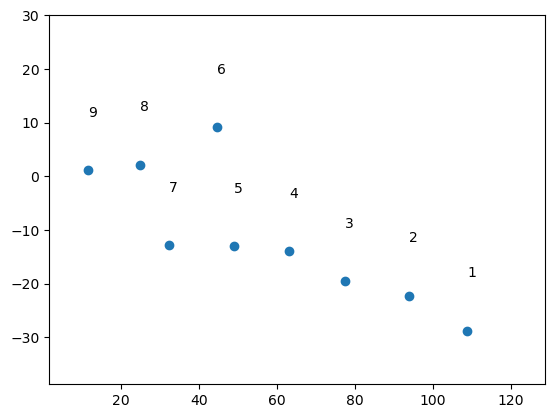

In [13]:

plt.scatter(X_embedded[:,0], X_embedded[:,1])
  
# Loop for annotation of all points
for i in range(len(X_embedded[:,0])):
    plt.annotate(str(i+1), (X_embedded[i,0], X_embedded[i,1] + 10))

plt.xlim((-10+np.min(X_embedded[:,0]), 10+np.max(X_embedded[:,0])+10))
plt.ylim((-10+np.min(X_embedded[:,1]), 10+np.max(X_embedded[:,1])+11))
plt.show()

### Look at the bracket embedding of the model

##### Sanity check for the bracket embeddings

Since we have used a canonical form throughout, the brackets with decreasing momentum labels should have not been learned

In [14]:
xbracketfull = torch.LongTensor(
    [env.word2id[str(w)] for w in env.special_tokens] 
).view(-1, 1).transpose(0, 1)

with torch.no_grad():
    tensor_bracket_full = encoder.embeddings(xbracketfull)

In [15]:
pca_bk_full = PCA(n_components=2)
pca_res_bk_full = pca_bk_full.fit_transform(tensor_bracket_full.numpy()[0])
print(pca_bk_full.explained_variance_ratio_)
print(pca_bk_full.explained_variance_ratio_.cumsum())

[0.0994288 0.0457202]
[0.0994288  0.14514899]


In [18]:
import seaborn as sns
color_points = [0 for i in range(int(len(env.special_tokens)/2))]+[1 for i in range(int(len(env.special_tokens)/2))]
my_cmap = ListedColormap(sns.color_palette()[0:2])

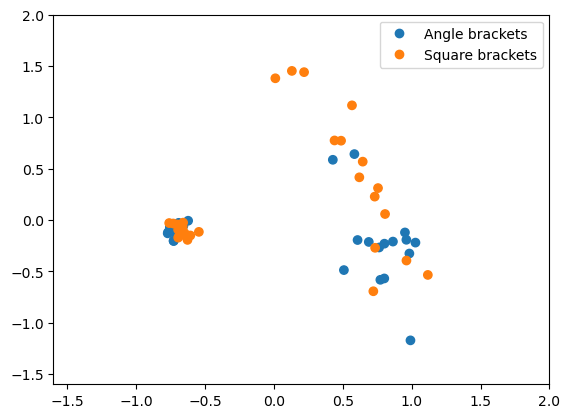

In [19]:
scatter_plt = plt.scatter(pca_res_bk_full[:,0], pca_res_bk_full[:,1], c=color_points, cmap=my_cmap)
  
plt.legend(handles=scatter_plt.legend_elements()[0], labels=['Angle brackets', 'Square brackets'])

plt.xlim((-1.6, 2))
plt.ylim((-1.6, 2))

#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/redundant_brackets_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/redundant_brackets_{}.png'.format(file_tag), bbox_inches='tight')


plt.show()

As expected the embeddings that have not been used in training are clustered in their own subspace with no particular structure. The other learned embeddings have some inherent structure, where we can distinguish between the square and angle brackets in particular.

#####  Bracket embeddings

Now retain only the relevant brackets

In [20]:
tokens_red = [tok for tok in env.special_tokens if int(tok[-1]) > int(tok[-2])]

xbracketred = torch.LongTensor(
    [env.word2id[str(w)] for w in tokens_red] 
).view(-1, 1).transpose(0, 1)

with torch.no_grad():
    tensor_bracket_red = encoder.embeddings(xbracketred)

In [21]:
pca_bk_red = PCA(n_components=2)
pca_res_bk_red = pca_bk_red.fit_transform(tensor_bracket_red.numpy()[0])
print(pca_bk_red.explained_variance_ratio_)
print(pca_bk_red.explained_variance_ratio_.cumsum())

[0.05941269 0.04989089]
[0.05941269 0.10930358]


In [22]:
color_points_red = [list(sns.color_palette()[0]) for i in range(int(len(tokens_red)/2))]+[list(sns.color_palette()[1]) for i in range(int(len(tokens_red)/2))]

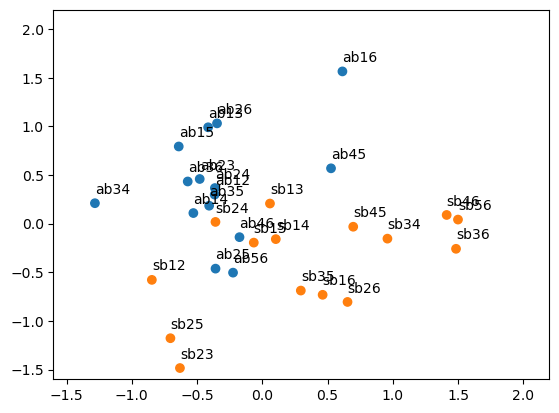

In [23]:
plt.scatter(pca_res_bk_red[:,0], pca_res_bk_red[:,1], c=color_points_red)
  
# Loop for annotation of all points
for i in range(len(pca_res_bk_red[:,0])):
    plt.annotate(tokens_red[i], (pca_res_bk_red[i,0], pca_res_bk_red[i,1] + 0.1))

plt.xlim((-1.6, 2.2))
plt.ylim((-1.6, 2.2))
plt.show()

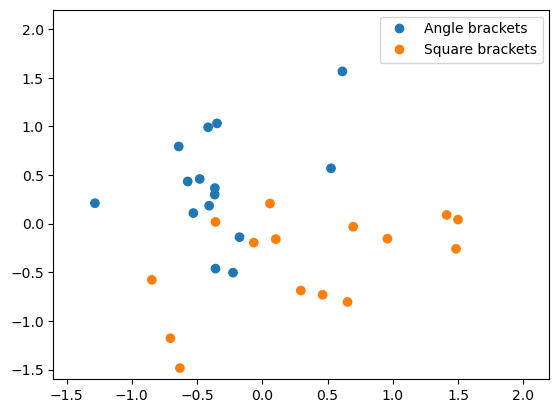

In [24]:
plt.scatter(pca_res_bk_red[:,0], pca_res_bk_red[:,1], c=color_points_red)
  
plt.legend(handles=scatter_plt.legend_elements()[0], labels=['Angle brackets', 'Square brackets'])


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/relevant_brackets_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/relevant_brackets_{}.png'.format(file_tag), bbox_inches='tight')


plt.xlim((-1.6, 2.2))
plt.ylim((-1.6, 2.2))
plt.show()

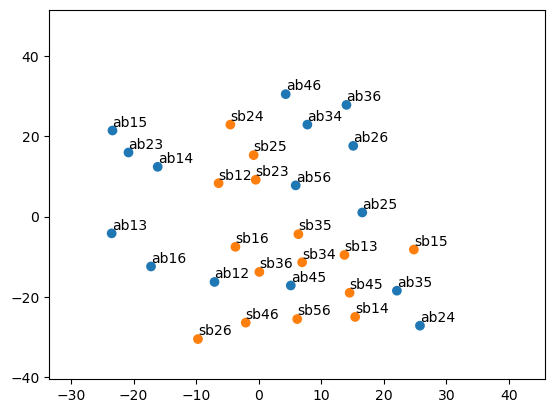

In [25]:
X_embedded_bk_red = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(tensor_bracket_red.numpy()[0])

plt.scatter(X_embedded_bk_red[:,0], X_embedded_bk_red[:,1], c=color_points_red)
  
# Loop for annotation of all points
for i in range(len(X_embedded_bk_red[:,0])):
    plt.annotate(tokens_red[i], (X_embedded_bk_red[i,0], X_embedded_bk_red[i,1] + 1))

plt.xlim((-10+np.min(X_embedded_bk_red[:,0]), 10+np.max(X_embedded_bk_red[:,0])+10))
plt.ylim((-10+np.min(X_embedded_bk_red[:,1]), 10+np.max(X_embedded_bk_red[:,1])+11))
plt.show()

We have a clear distinction in the embedding space between the angle brackets and the square brackets
In general it seems like brackets with the same first momentum label a clustered near each other. Though it is hard to get a definite conclusion.

### Embedding of all of the relevant tokens now

In [26]:
special_word= ['&']
tokens_red = [tok for tok in env.special_tokens if int(tok[-1]) > int(tok[-2])]
operators_red = ['add', 'mul', 'pow']
constants = [const for const in env.constants if const  != 'M']
#tokens_full = tokens_red + constants + list(env.variables.keys()) + operators_red + env.symbols+env.elements +special_word
tokens_full = tokens_red  + operators_red + env.symbols+env.elements 

xtokens_full= torch.LongTensor(
    [env.word2id[str(w)] for w in tokens_full] 
).view(-1, 1).transpose(0, 1)

with torch.no_grad():
    tensor_tokens_full = encoder.embeddings(xtokens_full)

In [27]:
pca_tokens_full = PCA(n_components=2)
pca_res_tokens_full = pca_tokens_full.fit_transform(tensor_tokens_full.numpy()[0])
print(pca_tokens_full.explained_variance_ratio_)
print(pca_tokens_full.explained_variance_ratio_.cumsum())

[0.12100108 0.04618902]
[0.12100108 0.1671901 ]


In [28]:
my_cmap_tokens = ListedColormap(sns.color_palette()[0:7])
#color_points_tokens = [0 for i in range(len(tokens_red))]+[1 for i in range(len(constants))]+[2 for i in range(len(list(env.variables.keys())))] +[3 for i in range(len(operators_red))] +[4 for i in range(len(env.symbols))]+[5 for i in range(len(env.elements))] +[6 for i in range(len(special_word))]
color_points_tokens = [0 for i in range(len(tokens_red))]+[1 for i in range(len(operators_red))] +[2 for i in range(len(env.symbols))]+[3 for i in range(len(env.elements))]

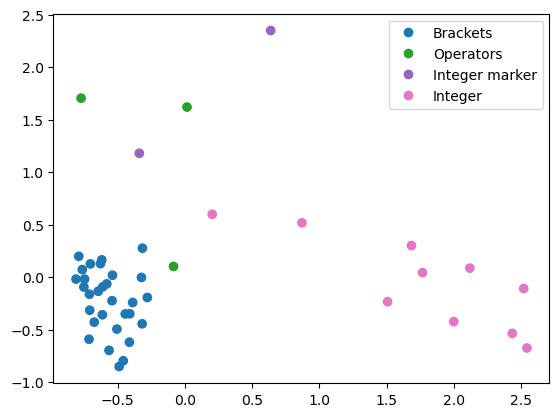

In [29]:
scatter_plt_tokens = plt.scatter(pca_res_tokens_full[:,0], pca_res_tokens_full[:,1],c =color_points_tokens,cmap=my_cmap_tokens)
#plt.legend(handles=scatter_plt_tokens.legend_elements()[0], labels=['Brackets', 'Identity name', 'Identity momenta', 'Operators', 'Integer marker', 'Integer', 'Delimiter'], loc='upper right')
plt.legend(handles=scatter_plt_tokens.legend_elements()[0], labels=['Brackets', 'Operators', 'Integer marker', 'Integer'], loc='upper right')

# Loop for annotation of all points
#for i in range(len(pca_res_tokens_full[:,0])):
 #   plt.annotate(tokens_full[i], (pca_res_tokens_full[i,0], pca_res_tokens_full[i,1] + 0.1))

#plt.xlim((-0.8, 0.3))
#plt.ylim((-0.5, 0.8))

#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/all_tokens_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/all_tokens_{}.png'.format(file_tag), bbox_inches='tight')



plt.show()

### Embedding at the equation level now

##### Define a path to the prefix file and read some equations from it

In [30]:
import random
random.seed(42)

in_path = '../experiments/npt6-infos/data.prefix.counts.valid'
load_num = 2500


with open(in_path) as infile:
    lines = random.sample([line for line in infile],load_num)
    prefix_lists = [(line.split('\t')[0].split('|')[1]).split(' ') for line in lines]
    scr_lists = [line.split('&')[1] for line in lines]

In [31]:
with open(in_path) as infile:
    files_lines = [line for line in infile]
    indices = [files_lines.index(line) for line in lines]

##### Recover the different equation embeddings

In [75]:
import time
import sympy as sp
from environment.utils import convert_sp_forms, get_helicity_expr, get_n_point
from sympy import latex

encoded_eq = []
decoded_eq = []
mean_encoded_eq = []

start_time = time.time()

for i, prefix in enumerate(prefix_lists):
    x1 = torch.LongTensor([env.eos_index] + [env.word2id[w] for w in prefix] + [env.eos_index]).view(-1, 1)
    len1 = torch.LongTensor([len(x1)])
    with torch.no_grad():
        encoded = encoder('fwd', x=x1, lengths=len1, causal=False)
        encoded_eq.append(torch.squeeze(encoded).numpy())
        mean_encoded_eq.append(torch.mean(torch.squeeze(encoded),0).numpy())
        decoded, _, _ = decoder.generate_beam(encoded.transpose(0, 1), len1, beam_size=1,
                                           length_penalty=1.0,
                                           early_stopping=True,
                                           max_len=params.max_len)
        ids = decoded[1:-1].tolist()
        tok = [env.id2word[wid[0]] for wid in ids]
        try:
            decoded_eq.append(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(tok)), env.func_dict))
        except:
            decoded_eq.append('Invalid')
    if i%int(len(prefix_lists)/10)==0:
        print("Did {} % in {} s".format(int(100*i/len(prefix_lists)), round(time.time() - start_time,2)))
        start_time = time.time()

Did 0 % in 0.26 s
Did 10 % in 76.8 s
Did 20 % in 79.3 s
Did 30 % in 94.87 s
Did 40 % in 92.74 s
Did 50 % in 123.45 s
Did 60 % in 142.15 s
Did 70 % in 108.03 s
Did 80 % in 83.61 s
Did 90 % in 82.79 s


###### Recover the helicty and n_point properties of the expression. Also recover the number of brackets and whether the  prediction of the model is accurate

In [35]:
n_points = [get_n_point(env.infix_to_sympy(env.prefix_to_infix(prefix))) for prefix in prefix_lists]
helicities = [get_helicity_expr(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(prefix)), env.func_dict), list(env.func_dict.values())) for prefix in prefix_lists]
num_ids = [sum(map(scr_info.count, ['M','S','Z','ID'])) for scr_info in scr_lists]
num_bks = [sum(map(((' ').join(prefix)).count,['sb','ab'])) for prefix in prefix_lists]

In [36]:
eval_file_b1 = '../experiments/dumped/Test_eval_spin_hel/npt6_b1n/eval.spin_hel.valid.0'
eval_file_b5 = '../experiments/dumped/Test_eval_spin_hel/npt6_b5n/eval.spin_hel.valid.0'

with open(eval_file_b1) as b1file:
    valid_b1_all = [int(line.split('/')[0][-1]) for line in b1file if 'Equation' in line]
    valid_b1 = np.array(valid_b1_all)[indices]

with open(eval_file_b5) as b5file:
    valid_b5_all = [min(int(line.split('/')[0][-1]),1) for line in b5file if 'Equation' in line]
    valid_b5_temp = np.array(valid_b5_all)[indices]
    valid_b5 = np.maximum(valid_b5_temp, valid_b1)

##### Plot the PCA version and annotate either helicity or n_point

In [37]:
pca_eqs = PCA(n_components=2)
pca_res_eqs = pca_eqs.fit_transform(np.array(mean_encoded_eq))

print(pca_eqs.explained_variance_ratio_)
print(pca_eqs.explained_variance_ratio_.cumsum())

X_embedded_eqs = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50).fit_transform(np.array(mean_encoded_eq))

[0.51435417 0.27038616]
[0.51435417 0.7847403 ]


/Users/aurelien/miniforge3/envs/spinorhelicity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


##### Start with the helicity

In [38]:
from matplotlib.colors import ListedColormap
import colorcet as cc


true_max = max([hel for hel in helicities if not isinstance(hel, str)])
helicities2 = [true_max+1 if isinstance(hel, str) else hel for hel in helicities]

min_h = min(helicities2)
color_val =np.array(helicities2)+abs(min_h)
hel_list = list(np.unique(np.array(helicities2)))
counts_hel = [helicities2.count(un) for un in hel_list]

my_cmap = ListedColormap(sns.color_palette(cc.glasbey, n_colors=len(hel_list)))

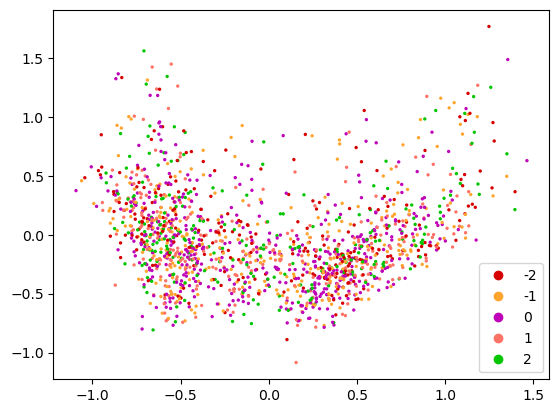

In [39]:
num_cutoff = 200
mask_hel = [1 if count > num_cutoff else 0 for count in counts_hel]
filter_index = [i for i, hel in enumerate(helicities2) if mask_hel[hel_list.index(hel)]==1]
hel_filter = [i for i, hel in enumerate(hel_list) if mask_hel[hel_list.index(hel)]==1]

hel_list2 = hel_list.copy()
hel_list2[-1] = 'N/A' if hel_list[-1] > true_max else hel_list[-1]

scatter = plt.scatter(pca_res_eqs[filter_index,0], pca_res_eqs[filter_index,1], c=color_val[filter_index], cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.array(hel_list2)[hel_filter]))
plt.show()

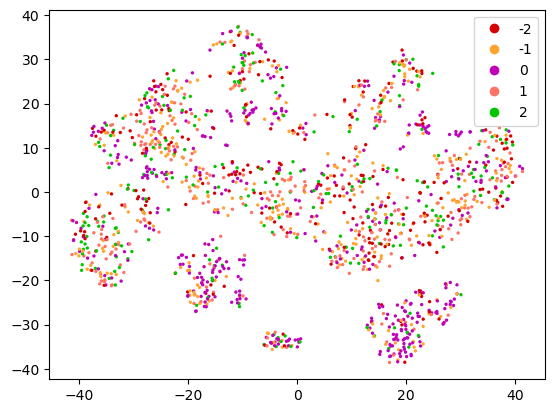

In [40]:
scatter = plt.scatter(X_embedded_eqs[filter_index,0], X_embedded_eqs[filter_index,1], c=color_val[filter_index], cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.array(hel_list2)[hel_filter]))
plt.show()

##### Now plot the number of external momenta

In [41]:
legendplott=[str(label)+'-points' for label in list(np.unique(np.array(n_points)))]

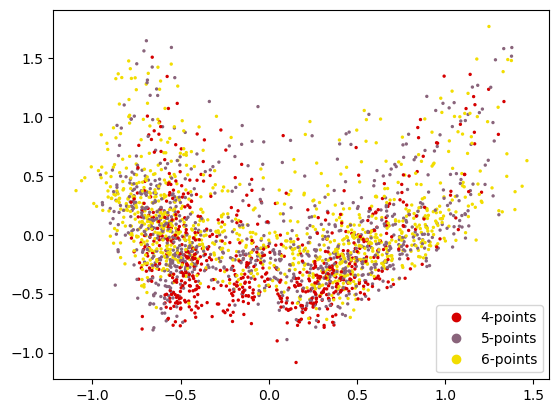

In [42]:
color_val =np.array(n_points)
my_cmap = ListedColormap(sns.color_palette(cc.glasbey, n_colors=len(color_val)))

scatter = plt.scatter(pca_res_eqs[:,0], pca_res_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=legendplott)
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_npts_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_npts_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

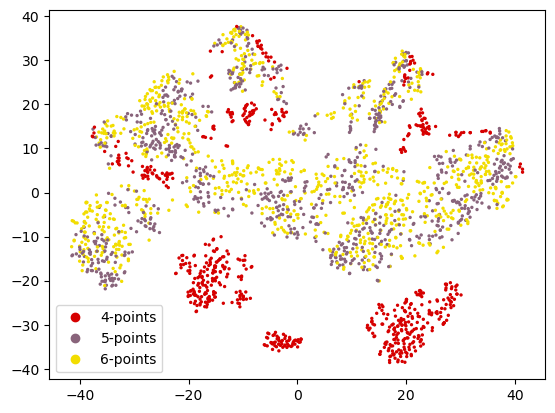

In [43]:
scatter = plt.scatter(X_embedded_eqs[:,0], X_embedded_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=legendplott)
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_npts_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_npts_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

##### Plot with respect to the number of identities used to scramble

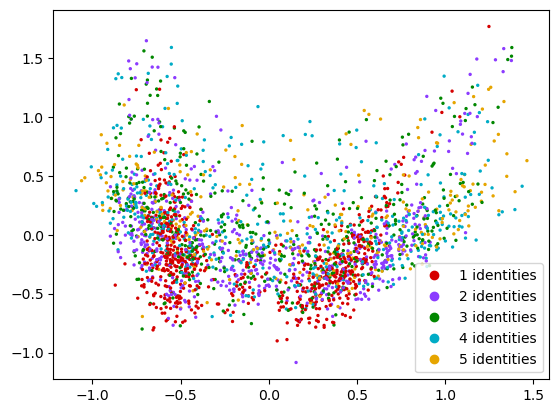

In [44]:
legendplotids=[str(label)+' identities' for label in list(np.unique(np.array(num_ids)))]

color_val =np.array(num_ids)
my_cmap = ListedColormap(sns.color_palette(cc.glasbey_dark, n_colors=len(legendplotids)))

scatter = plt.scatter(pca_res_eqs[:,0], pca_res_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=legendplotids)
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_nids_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_nids_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

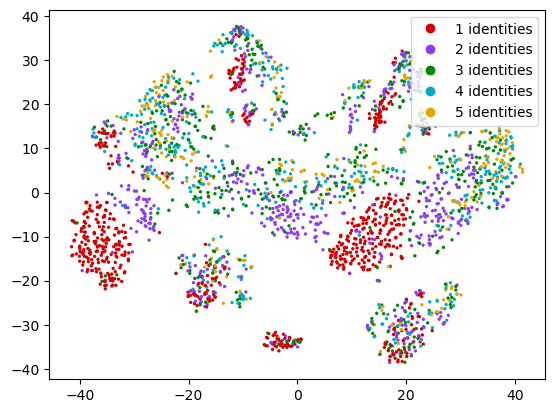

In [45]:
scatter = plt.scatter(X_embedded_eqs[:,0], X_embedded_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=legendplotids)
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_nids_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_nids_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

##### Now do a plot based on the number of the complexity (i.e number of brackets in the initial expression)

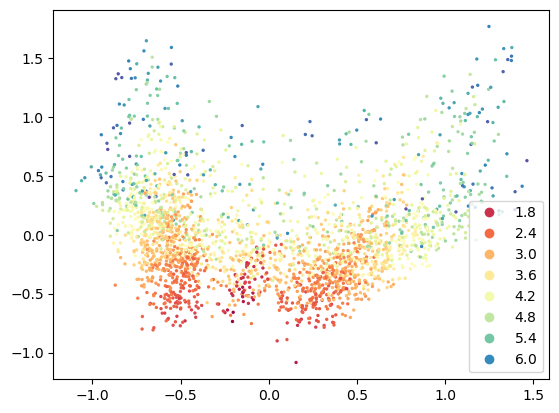

In [46]:
color_val =np.log(np.array(num_bks))
my_cmap = sns.color_palette("Spectral", as_cmap=True)

scatter = plt.scatter(pca_res_eqs[:,0], pca_res_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1])
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_nbks_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_nbks_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

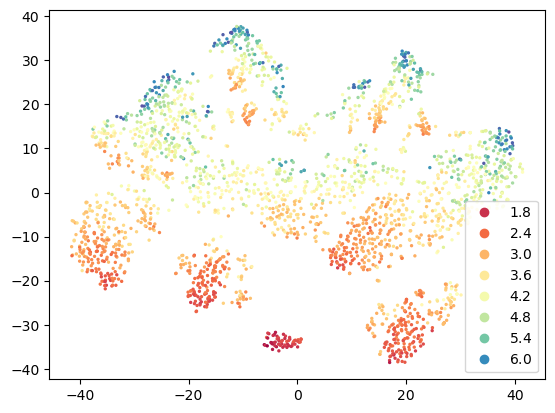

In [47]:
scatter = plt.scatter(X_embedded_eqs[:,0], X_embedded_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1])
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_nbks_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_nbks_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

##### Look at the validity of our predictions

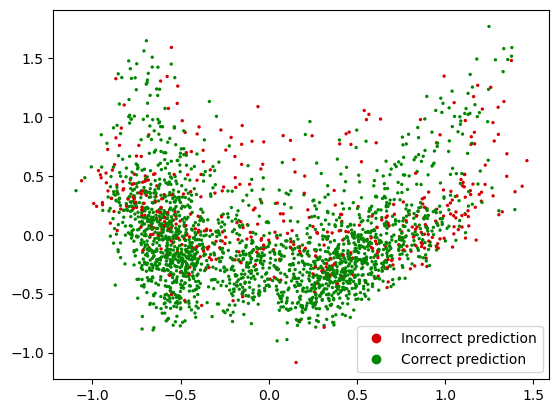

In [48]:
color_val = valid_b1
my_cmap = ListedColormap(sns.color_palette(cc.glasbey, n_colors=3))

scatter = plt.scatter(pca_res_eqs[:,0], pca_res_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=['Incorrect prediction', 'Correct prediction'])
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_nbks_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/pca_nbks_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

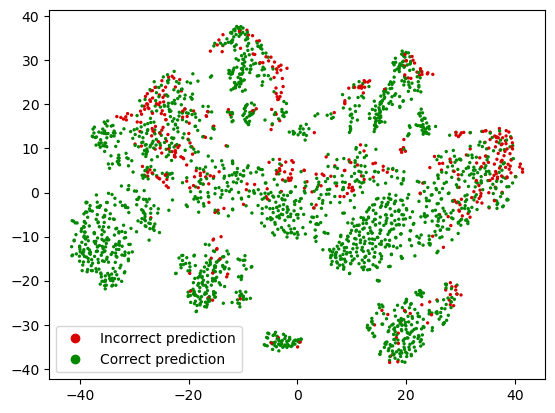

In [49]:
scatter = plt.scatter(X_embedded_eqs[:,0], X_embedded_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=['Incorrect prediction', 'Correct prediction'])
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_correct_pred_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_correct_pred_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

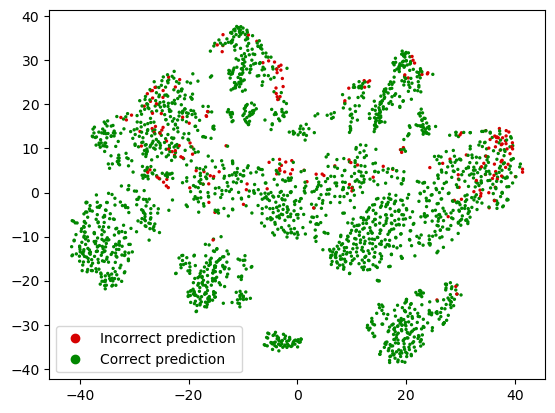

In [50]:
color_val = valid_b5


scatter = plt.scatter(X_embedded_eqs[:,0], X_embedded_eqs[:,1], c=color_val, cmap=my_cmap, s=2)
plt.legend(handles=scatter.legend_elements()[0], labels=['Incorrect prediction', 'Correct prediction'])
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_correct_predb5_{}.pdf'.format(file_tag), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt6_exp2/tsne_correct_predb5_{}.png'.format(file_tag), bbox_inches='tight')
plt.show()

##### Comparing to a given input equation

In [52]:
from environment.utils import reorder_expr
input_eqs = ['((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*sb(2, 3)/sb(1, 3) + sb(1, 2)*sb(3, 5)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/(((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*ab(4, 5)/sb(1, 2) - ab(3, 4)*sb(1, 3)/sb(1, 2))*ab(2, 3)*sb(3, 5))',
            '(sb(1, 2)*sb(3, 5)/sb(1, 3) + sb(1, 5)*sb(2, 3)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))',
            'ab(3, 4)**2*sb(1, 2)*sb(2, 5)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))',
            'ab(3, 4)**2*sb(1, 2)*sb(2, 5)/(ab(2, 3)*ab(2, 4)*sb(3, 5))']
mean_encode_inputs = []

for input_eq in input_eqs:
    f = sp.parse_expr(input_eq, local_dict=env.func_dict)
    f = reorder_expr(f)
    f = f.cancel()
    f_prefix = env.sympy_to_prefix(f)
    x1_prefix = f_prefix
    x1 = torch.LongTensor([env.eos_index] + [env.word2id[w] for w in x1_prefix] + [env.eos_index]).view(-1, 1)
    len1 = torch.LongTensor([len(x1)])
    with torch.no_grad():
        encoded_input_eq = encoder('fwd', x=x1, lengths=len1, causal=False)
        mean_encode_inputs.append(torch.mean(torch.squeeze(encoded_input_eq),0).numpy())

In [53]:
tsne2 = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50)

In [54]:
X_embedded_eqs_add = tsne2.fit_transform(np.array(mean_encoded_eq+mean_encode_inputs))

/Users/aurelien/miniforge3/envs/spinorhelicity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


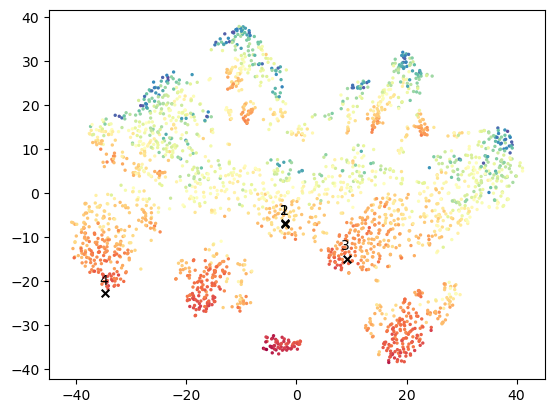

In [55]:
color_val =np.log(np.array(num_bks))
my_cmap = sns.color_palette("Spectral", as_cmap=True)
l_max = len(mean_encode_inputs)
scatter_all = plt.scatter(X_embedded_eqs_add[0:-l_max,0], X_embedded_eqs_add[0:-l_max,1],s=2,cmap=my_cmap,c=color_val)
plt.scatter(X_embedded_eqs_add[-l_max:,0], X_embedded_eqs_add[-l_max:,1],s=30,marker='x',c='black')

# Loop for annotation of all points
for i in range(l_max):
    plt.annotate(i+1, (X_embedded_eqs_add[-l_max+i,0]-1,X_embedded_eqs_add[-l_max+i,1] + 2))

plt.show()

##### Isolating a given region

In [102]:
x_min = -10
x_max = 5
y_min = -40
y_max = -30

mask_region = (X_embedded_eqs[:,0]> x_min)&(X_embedded_eqs[:,0]< x_max)&(X_embedded_eqs[:,1]> y_min) & (X_embedded_eqs[:,1]< y_max) 
indices_region = np.where(mask_region)[0]

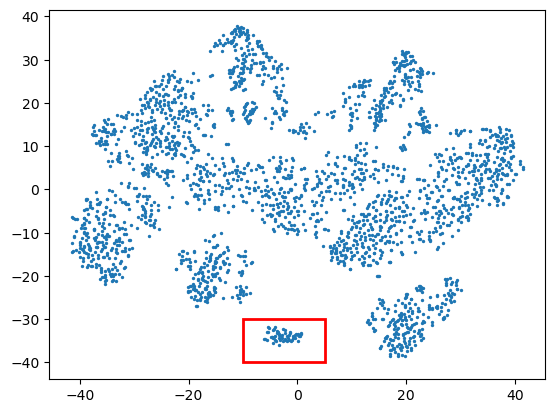

In [93]:
import matplotlib.patches as mpatches

rect=mpatches.Rectangle((x_min,y_min),x_max-x_min,y_max-y_min, 
                        fill = False,
                        color = "red",
                        linewidth = 2)
scatter = plt.scatter(X_embedded_eqs[:,0], X_embedded_eqs[:,1], s=2)
plt.gca().add_patch(rect)
plt.show()

In [111]:
num_rep_region = 5
random.seed(42)

indices_rep = random.sample(list(indices_region), num_rep_region)

for i, index_rep in enumerate(indices_rep):
    print("Representative {}".format(i+1))
    display(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(prefix_lists[index_rep])), env.func_dict))
    print('\n')

Representative 1


-ab(3, 4)**2*sb(1, 3)*sb(1, 4)**3*sb(2, 4)/(ab(1, 2)*sb(1, 2)**2)



Representative 2


-ab(3, 4)*sb(1, 3)*sb(2, 4)*sb(3, 4)**2/(ab(1, 2)**2*ab(2, 4)*sb(2, 3))



Representative 3


-sb(1, 3)*sb(1, 4)/(ab(2, 3)*ab(2, 4)*sb(1, 2)*sb(3, 4))



Representative 4


ab(2, 4)*ab(3, 4)*sb(2, 3)/(ab(1, 4)**2*ab(2, 3)*sb(2, 4)*sb(3, 4))



Representative 5


ab(1, 3)**2*sb(2, 3)/(ab(2, 3)**2*ab(2, 4)*sb(2, 4)**4)

### Finding the nearest neighbour in the full embedding space

In [76]:
ref_eq_index = 742
k_max_eq = 5
ref_eq = convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(prefix_lists[ref_eq_index])), env.func_dict)
ref_encoding = mean_encoded_eq[ref_eq_index]
display(ref_eq)

ab(1, 3)*ab(2, 3)**2*sb(1, 2)**2*sb(2, 4)**2/(ab(1, 2)*ab(3, 4)**2 - ab(1, 3)*ab(2, 4)*ab(3, 4))

##### Look at the cosine similarity

In [77]:
norm_dot_prod = [np.dot(tgt_encoding, ref_encoding)/np.sqrt(np.dot(tgt_encoding, tgt_encoding)*np.dot(ref_encoding, ref_encoding)) for tgt_encoding in mean_encoded_eq]

In [78]:
max_sim = sorted(zip(norm_dot_prod, prefix_lists, decoded_eq), reverse=True)[1:k_max_eq+1]
min_sim = sorted(zip(norm_dot_prod, prefix_lists, decoded_eq), reverse=False)[:k_max_eq]

In [79]:
print("Reference Equation:")
#display(ref_eq)
print(latex(ref_eq))
print("Proposed simple form:")
print(latex(decoded_eq[ref_eq_index]))

#display(decoded_eq[ref_eq_index])
print('\n')
print("Top 5 similar equations (aligned dot product) \n")
for score, eq, decode_eq in max_sim:
    print("Score : {}".format(score))
    #print(latex(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict)))
    display(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict))
    print("Proposed simple form:")
    #print(latex(decode_eq))
    display(decode_eq)
    print("\n")

print("Top 5 least similar equations (anti-aligned dot product)\n")
for score, eq, decode_eq in min_sim:
    print("Score : {}".format(score))
    #print(latex(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict)))
    display(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict))
    print("Proposed simple form:")
    display(decode_eq)
    #print(latex(decode_eq))
    print("\n")

Reference Equation:
\frac{\langle 1 3 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right]^{2} \left[ 2 4 \right]^{2}}{\langle 1 2 \rangle \langle 3 4 \rangle^{2} - \langle 1 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle}
Proposed simple form:
- \frac{\langle 1 3 \rangle \left[ 1 2 \right] \left[ 1 4 \right] \left[ 2 4 \right]^{2}}{\langle 1 4 \rangle}


Top 5 similar equations (aligned dot product) 

Score : 0.9676752686500549


ab(1, 3)*ab(1, 4)*ab(2, 4)**2*ab(3, 4)*sb(2, 3)**2/(ab(1, 2)*ab(3, 4)*sb(3, 4)**2 - ab(1, 3)*ab(2, 4)*sb(3, 4)**2)

Proposed simple form:


-ab(1, 3)*ab(2, 4)**2*ab(3, 4)*sb(2, 3)**2/(ab(2, 3)*sb(3, 4)**2)



Score : 0.9546768069267273


ab(1, 4)**2*ab(3, 4)*sb(2, 4)**3*sb(3, 4)**4/(ab(1, 2)*ab(1, 3)**2*ab(2, 4)*sb(2, 4) + ab(1, 2)*ab(1, 3)**2*ab(3, 4)*sb(3, 4))

Proposed simple form:


-ab(3, 4)*sb(2, 3)*sb(2, 4)*sb(3, 4)**4/(ab(1, 2)*ab(2, 3))



Score : 0.9508346915245056


ab(1, 4)*ab(2, 4)**3*ab(3, 4)*sb(1, 4)**2*sb(3, 4)/(ab(1, 2)*ab(3, 4)*sb(1, 3)**2*sb(2, 3) - ab(1, 3)*ab(2, 4)*sb(1, 3)**2*sb(2, 3))

Proposed simple form:


-ab(1, 2)*ab(2, 4)*ab(3, 4)*sb(1, 4)/sb(2, 3)



Score : 0.9503195285797119


-ab(1, 2)**2*ab(2, 3)**2*sb(3, 4)/(ab(1, 2)*ab(1, 3)*ab(3, 4) - ab(1, 3)**2*ab(2, 4))

Proposed simple form:


ab(1, 2)**2*ab(2, 3)*sb(3, 4)/(ab(1, 3)*ab(1, 4))



Score : 0.9485375285148621


-ab(1, 2)**2*ab(2, 3)**2*ab(2, 4)*sb(1, 4)**2*sb(3, 4)/(ab(1, 3)**2*ab(1, 4)**2*sb(1, 2)*sb(1, 3) + ab(1, 3)*ab(1, 4)**2*ab(3, 4)*sb(1, 2)*sb(3, 4))

Proposed simple form:


ab(1, 2)**2*ab(2, 3)*ab(2, 4)*sb(1, 4)**2*sb(3, 4)/(ab(1, 3)*ab(1, 4)**2*sb(1, 2)*sb(2, 3))



Top 5 least similar equations (anti-aligned dot product)

Score : -0.4085972309112549


(ab(1, 2)*sb(1, 2) + ab(1, 2)*sb(1, 4) + ab(1, 3)*sb(1, 3) + ab(1, 4)*sb(1, 4))/(ab(3, 4)*sb(1, 4))

Proposed simple form:


ab(1, 2)/ab(3, 4)



Score : -0.35889577865600586


(ab(1, 4)**2*ab(3, 4)*sb(1, 2)*sb(1, 3) + ab(1, 4)*ab(2, 4)*ab(3, 4)*sb(1, 2)*sb(2, 3))/sb(3, 5)

Proposed simple form:


-ab(1, 4)*ab(3, 4)*ab(4, 5)*sb(1, 2)



Score : -0.33775120973587036


(-ab(1, 2)*sb(1, 4)*sb(2, 4) + ab(1, 3)*sb(1, 3)*sb(2, 3) + ab(2, 3)*sb(2, 4)*sb(3, 4))/sb(2, 4)

Proposed simple form:


ab(1, 3)*sb(1, 3)*sb(2, 3)/sb(2, 4)



Score : -0.26282572746276855


(ab(1, 2)*ab(1, 4)*ab(3, 5)*ab(4, 5) + ab(1, 4)*ab(1, 5)*ab(2, 4)*ab(3, 5))/sb(1, 5)

Proposed simple form:


ab(1, 4)**2*ab(2, 5)*ab(3, 5)/sb(1, 5)



Score : -0.24497151374816895


(ab(1, 2)*sb(1, 2)**2*sb(3, 4) - ab(1, 2)*sb(1, 2)*sb(1, 3)*sb(2, 4))/sb(3, 4)**2

Proposed simple form:


-ab(2, 3)*sb(1, 2)*sb(2, 3)/sb(3, 4)

##### Now look at the actual distance in the embedding space (L2 norm)

In [80]:
legendplott=[str(label)+'-points' for label in list(np.unique(np.array(n_points)))]

In [81]:
norm_distance = [np.linalg.norm(ref_encoding-tgt_encoding) for tgt_encoding in mean_encoded_eq]

In [82]:
max_dist = sorted(zip(norm_distance, prefix_lists, decoded_eq), reverse=True)[0:k_max_eq]
min_dist = sorted(zip(norm_distance, prefix_lists, decoded_eq), reverse=False)[1:k_max_eq+1]

In [84]:
print("Reference Equation:")
display(ref_eq)
#print(latex(ref_eq))
print("Proposed simple form:")
display(decoded_eq[ref_eq_index])
#print(latex(decoded_eq[ref_eq_index]))
print('\n')
print("Top 5 similar equations (minimal distance) \n")
for score, eq, decode_eq in min_dist:
    print("Score : {}".format(score))
    #print(latex(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict)))
    display(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict))
    print("Proposed simple form:")
    display(decode_eq)
    #print(latex(decode_eq))
    print("\n")

print("Top 5 least similar equations (maximal distance)\n")
for score, eq, decode_eq in max_dist:
    print("Score : {}".format(score))
    display(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(eq)), env.func_dict))
    print("Proposed simple form:")
    display(decode_eq)
    print("\n")

Reference Equation:


ab(1, 3)*ab(2, 3)**2*sb(1, 2)**2*sb(2, 4)**2/(ab(1, 2)*ab(3, 4)**2 - ab(1, 3)*ab(2, 4)*ab(3, 4))

Proposed simple form:


-ab(1, 3)*sb(1, 2)*sb(1, 4)*sb(2, 4)**2/ab(1, 4)



Top 5 similar equations (minimal distance) 

Score : 0.1695561707019806


ab(1, 3)*ab(1, 4)*ab(2, 4)**2*ab(3, 4)*sb(2, 3)**2/(ab(1, 2)*ab(3, 4)*sb(3, 4)**2 - ab(1, 3)*ab(2, 4)*sb(3, 4)**2)

Proposed simple form:


-ab(1, 3)*ab(2, 4)**2*ab(3, 4)*sb(2, 3)**2/(ab(2, 3)*sb(3, 4)**2)



Score : 0.19169189035892487


-ab(1, 2)**2*ab(2, 3)**2*sb(3, 4)/(ab(1, 2)*ab(1, 3)*ab(3, 4) - ab(1, 3)**2*ab(2, 4))

Proposed simple form:


ab(1, 2)**2*ab(2, 3)*sb(3, 4)/(ab(1, 3)*ab(1, 4))



Score : 0.19793207943439484


ab(1, 4)**2*ab(3, 4)*sb(2, 4)**3*sb(3, 4)**4/(ab(1, 2)*ab(1, 3)**2*ab(2, 4)*sb(2, 4) + ab(1, 2)*ab(1, 3)**2*ab(3, 4)*sb(3, 4))

Proposed simple form:


-ab(3, 4)*sb(2, 3)*sb(2, 4)*sb(3, 4)**4/(ab(1, 2)*ab(2, 3))



Score : 0.20882736146450043


-ab(1, 3)**3*ab(2, 4)*sb(1, 4)**2*sb(2, 3)**3/(ab(1, 2)*sb(1, 2)*sb(2, 4)**3 + ab(2, 4)*sb(2, 4)**4)

Proposed simple form:


-ab(1, 4)**2*ab(2, 4)*sb(1, 4)



Score : 0.20885789394378662


ab(1, 3)*ab(2, 3)*ab(2, 4)**2*ab(3, 4)**2*sb(2, 3)/(ab(1, 2)*sb(1, 2)*sb(3, 4) - ab(1, 2)*sb(1, 3)*sb(2, 4))

Proposed simple form:


-ab(1, 3)*ab(2, 4)**2*ab(3, 4)**2/sb(3, 4)



Top 5 least similar equations (maximal distance)

Score : 2.531532049179077


ab(3, 6)*sb(2, 4)*sb(3, 4)*sb(5, 6)**4/(ab(1, 5)**6*sb(1, 2)*sb(1, 5)**5*sb(2, 3)**3 + 5*ab(1, 5)**5*ab(2, 5)*sb(1, 2)*sb(1, 5)**4*sb(2, 3)**3*sb(2, 5) + 5*ab(1, 5)**5*ab(3, 5)*sb(1, 2)*sb(1, 5)**4*sb(2, 3)**3*sb(3, 5) + 5*ab(1, 5)**5*ab(4, 5)*sb(1, 2)*sb(1, 5)**4*sb(2, 3)**3*sb(4, 5) + 10*ab(1, 5)**4*ab(2, 5)**2*sb(1, 2)*sb(1, 5)**3*sb(2, 3)**3*sb(2, 5)**2 + 20*ab(1, 5)**4*ab(2, 5)*ab(3, 5)*sb(1, 2)*sb(1, 5)**3*sb(2, 3)**3*sb(2, 5)*sb(3, 5) + 20*ab(1, 5)**4*ab(2, 5)*ab(4, 5)*sb(1, 2)*sb(1, 5)**3*sb(2, 3)**3*sb(2, 5)*sb(4, 5) + 10*ab(1, 5)**4*ab(3, 5)**2*sb(1, 2)*sb(1, 5)**3*sb(2, 3)**3*sb(3, 5)**2 + 20*ab(1, 5)**4*ab(3, 5)*ab(4, 5)*sb(1, 2)*sb(1, 5)**3*sb(2, 3)**3*sb(3, 5)*sb(4, 5) + 10*ab(1, 5)**4*ab(4, 5)**2*sb(1, 2)*sb(1, 5)**3*sb(2, 3)**3*sb(4, 5)**2 + 10*ab(1, 5)**3*ab(2, 5)**3*sb(1, 2)*sb(1, 5)**2*sb(2, 3)**3*sb(2, 5)**3 + 30*ab(1, 5)**3*ab(2, 5)**2*ab(3, 5)*sb(1, 2)*sb(1, 5)**2*sb(2, 3)**3*sb(2, 5)**2*sb(3, 5) + 30*ab(1, 5)**3*ab(2, 5)**2*ab(4, 5)*sb(1, 2)*sb(1, 5)**2*sb(2, 3)*

Proposed simple form:


-ab(3, 6)*sb(2, 4)*sb(3, 4)/(ab(1, 5)*ab(5, 6)**5*sb(1, 2)*sb(2, 3)**3*sb(5, 6))



Score : 2.38423228263855


-ab(3, 4)**7*sb(1, 2)*sb(1, 5)**5*sb(4, 5)/(ab(1, 4)**7*ab(2, 3)*ab(3, 5)*sb(1, 4)**5*sb(1, 5)**7*sb(2, 5) + 7*ab(1, 4)**6*ab(2, 3)*ab(2, 4)*ab(3, 5)*sb(1, 4)**5*sb(1, 5)**6*sb(2, 5)**2 + 5*ab(1, 4)**6*ab(2, 3)*ab(3, 4)*ab(3, 5)*sb(1, 3)*sb(1, 4)**4*sb(1, 5)**6*sb(2, 5)*sb(4, 5) + 21*ab(1, 4)**5*ab(2, 3)*ab(2, 4)**2*ab(3, 5)*sb(1, 4)**5*sb(1, 5)**5*sb(2, 5)**3 + 30*ab(1, 4)**5*ab(2, 3)*ab(2, 4)*ab(3, 4)*ab(3, 5)*sb(1, 3)*sb(1, 4)**4*sb(1, 5)**5*sb(2, 5)**2*sb(4, 5) + 10*ab(1, 4)**5*ab(2, 3)*ab(3, 4)**2*ab(3, 5)*sb(1, 3)**2*sb(1, 4)**3*sb(1, 5)**5*sb(2, 5)*sb(4, 5)**2 + 35*ab(1, 4)**4*ab(2, 3)*ab(2, 4)**3*ab(3, 5)*sb(1, 4)**5*sb(1, 5)**4*sb(2, 5)**4 + 75*ab(1, 4)**4*ab(2, 3)*ab(2, 4)**2*ab(3, 4)*ab(3, 5)*sb(1, 3)*sb(1, 4)**4*sb(1, 5)**4*sb(2, 5)**3*sb(4, 5) + 50*ab(1, 4)**4*ab(2, 3)*ab(2, 4)*ab(3, 4)**2*ab(3, 5)*sb(1, 3)**2*sb(1, 4)**3*sb(1, 5)**4*sb(2, 5)**2*sb(4, 5)**2 + 10*ab(1, 4)**4*ab(2, 3)*ab(3, 4)**3*ab(3, 5)*sb(1, 3)**3*sb(1, 4)**2*sb(1, 5)**4*sb(2, 5)*sb(4, 5)**3 + 35*ab(1, 4)

Proposed simple form:


sb(1, 2)*sb(4, 5)/(ab(2, 3)*ab(3, 5)*sb(2, 5)*sb(3, 4)**5*sb(3, 5)**2)



Score : 2.3561949729919434


ab(1, 3)**2*ab(2, 5)**2*ab(3, 4)**4*ab(4, 5)**5*sb(1, 4)*sb(2, 3)**3*sb(2, 5)/(ab(1, 3)**3*ab(1, 4)**2*ab(2, 3)*ab(2, 4)*ab(4, 5)**3*sb(2, 3)**3*sb(3, 5)**3*sb(4, 5)**4 + 3*ab(1, 3)**2*ab(1, 4)**3*ab(2, 3)*ab(2, 4)*ab(4, 5)**3*sb(2, 3)**2*sb(2, 4)*sb(3, 5)**3*sb(4, 5)**4 + 3*ab(1, 3)**2*ab(1, 4)**2*ab(1, 5)*ab(2, 3)*ab(2, 4)*ab(3, 4)*ab(4, 5)**2*sb(1, 3)*sb(2, 3)**3*sb(3, 5)**2*sb(4, 5)**4 + 3*ab(1, 3)**2*ab(1, 4)**2*ab(1, 5)*ab(2, 3)*ab(2, 4)*ab(4, 5)**3*sb(2, 3)**2*sb(2, 5)*sb(3, 5)**3*sb(4, 5)**4 + 3*ab(1, 3)**2*ab(1, 4)**2*ab(2, 3)*ab(2, 4)*ab(2, 5)*ab(3, 4)*ab(4, 5)**2*sb(2, 3)**4*sb(3, 5)**2*sb(4, 5)**4 + 3*ab(1, 3)*ab(1, 4)**4*ab(2, 3)*ab(2, 4)*ab(4, 5)**3*sb(2, 3)*sb(2, 4)**2*sb(3, 5)**3*sb(4, 5)**4 + 6*ab(1, 3)*ab(1, 4)**3*ab(1, 5)*ab(2, 3)*ab(2, 4)*ab(3, 4)*ab(4, 5)**2*sb(1, 3)*sb(2, 3)**2*sb(2, 4)*sb(3, 5)**2*sb(4, 5)**4 + 6*ab(1, 3)*ab(1, 4)**3*ab(1, 5)*ab(2, 3)*ab(2, 4)*ab(4, 5)**3*sb(2, 3)*sb(2, 4)*sb(2, 5)*sb(3, 5)**3*sb(4, 5)**4 + 6*ab(1, 3)*ab(1, 4)**3*ab(2, 3)*ab(2, 4

Proposed simple form:


ab(1, 3)**2*ab(2, 5)**2*ab(3, 4)*ab(4, 5)**2*sb(1, 4)*sb(2, 5)/(ab(1, 4)**2*ab(2, 3)*ab(2, 4)*sb(3, 4)**3*sb(4, 5)**4)



Score : 2.310269594192505


ab(2, 4)**5*sb(1, 5)*sb(2, 4)*sb(2, 5)**4/(ab(1, 2)*ab(1, 4)**4*ab(2, 5)*ab(3, 4)**6*ab(3, 5)*sb(1, 3)**6*sb(3, 5) - 5*ab(1, 2)*ab(1, 4)**4*ab(2, 5)*ab(3, 4)**5*ab(3, 5)*ab(4, 5)*sb(1, 3)**5*sb(1, 5)*sb(3, 5) + 10*ab(1, 2)*ab(1, 4)**4*ab(2, 5)*ab(3, 4)**4*ab(3, 5)*ab(4, 5)**2*sb(1, 3)**4*sb(1, 5)**2*sb(3, 5) - 10*ab(1, 2)*ab(1, 4)**4*ab(2, 5)*ab(3, 4)**3*ab(3, 5)*ab(4, 5)**3*sb(1, 3)**3*sb(1, 5)**3*sb(3, 5) + 5*ab(1, 2)*ab(1, 4)**4*ab(2, 5)*ab(3, 4)**2*ab(3, 5)*ab(4, 5)**4*sb(1, 3)**2*sb(1, 5)**4*sb(3, 5) - ab(1, 2)*ab(1, 4)**4*ab(2, 5)*ab(3, 4)*ab(3, 5)*ab(4, 5)**5*sb(1, 3)*sb(1, 5)**5*sb(3, 5) + 4*ab(1, 2)*ab(1, 4)**3*ab(2, 4)*ab(2, 5)*ab(3, 4)**6*ab(3, 5)*sb(1, 3)**5*sb(2, 3)*sb(3, 5) - 16*ab(1, 2)*ab(1, 4)**3*ab(2, 4)*ab(2, 5)*ab(3, 4)**5*ab(3, 5)*ab(4, 5)*sb(1, 3)**4*sb(1, 5)*sb(2, 3)*sb(3, 5) + 24*ab(1, 2)*ab(1, 4)**3*ab(2, 4)*ab(2, 5)*ab(3, 4)**4*ab(3, 5)*ab(4, 5)**2*sb(1, 3)**3*sb(1, 5)**2*sb(2, 3)*sb(3, 5) - 16*ab(1, 2)*ab(1, 4)**3*ab(2, 4)*ab(2, 5)*ab(3, 4)**3*ab(3, 5)*ab(4, 

Proposed simple form:


sb(2, 4)/(ab(1, 5)*ab(2, 5)*ab(3, 4)*ab(3, 5)*ab(4, 5)**4*sb(1, 3)*sb(3, 5))



Score : 2.3059680461883545


-ab(1, 2)**2*ab(1, 6)*ab(2, 4)*ab(2, 6)*ab(3, 5)**2*ab(4, 5)**2*sb(1, 3)**3*sb(2, 5)**2*sb(3, 4)*sb(4, 5)*sb(5, 6)**2/(ab(1, 2)**2*ab(2, 3)**2*ab(4, 5)**2*ab(4, 6)*sb(1, 2)**3*sb(1, 3)**2*sb(5, 6)**2 - 2*ab(1, 2)**2*ab(2, 3)*ab(2, 4)*ab(4, 5)**2*ab(4, 6)*sb(1, 2)**3*sb(1, 3)*sb(2, 5)*sb(5, 6)**2 + 2*ab(1, 2)**2*ab(2, 3)*ab(4, 5)**3*ab(4, 6)*sb(1, 2)**2*sb(1, 3)*sb(1, 5)*sb(2, 5)*sb(5, 6)**2 + 2*ab(1, 2)**2*ab(2, 3)*ab(4, 5)**2*ab(4, 6)**2*sb(1, 2)**2*sb(1, 3)*sb(1, 6)*sb(2, 5)*sb(5, 6)**2 + ab(1, 2)**2*ab(2, 4)**2*ab(4, 5)**2*ab(4, 6)*sb(1, 2)**3*sb(2, 5)**2*sb(5, 6)**2 - 2*ab(1, 2)**2*ab(2, 4)*ab(4, 5)**3*ab(4, 6)*sb(1, 2)**2*sb(1, 5)*sb(2, 5)**2*sb(5, 6)**2 - 2*ab(1, 2)**2*ab(2, 4)*ab(4, 5)**2*ab(4, 6)**2*sb(1, 2)**2*sb(1, 6)*sb(2, 5)**2*sb(5, 6)**2 + ab(1, 2)**2*ab(4, 5)**4*ab(4, 6)*sb(1, 2)*sb(1, 5)**2*sb(2, 5)**2*sb(5, 6)**2 + 2*ab(1, 2)**2*ab(4, 5)**3*ab(4, 6)**2*sb(1, 2)*sb(1, 5)*sb(1, 6)*sb(2, 5)**2*sb(5, 6)**2 + ab(1, 2)**2*ab(4, 5)**2*ab(4, 6)**3*sb(1, 2)*sb(1, 6)**2*sb(2, 5)

Proposed simple form:


-ab(1, 6)*ab(2, 4)*ab(2, 6)*ab(3, 5)**2*sb(1, 3)*sb(3, 4)*sb(4, 5)/(ab(3, 4)**2*ab(4, 6)*sb(1, 2))

# Scratch for displaying equations

In [1515]:
from environment.utils import convert_sp_forms
pre1 = 'mul pow add mul pow sb13 INT+ 2 mul ab23 mul ab34 mul sb34 sb35 add mul pow sb13 INT+ 2 mul ab23 mul ab45 mul sb35 sb45 mul INT- 1 mul pow sb35 INT+ 2 mul ab23 mul ab45 mul sb13 sb14 INT- 1 add mul INT- 1 mul pow ab34 INT+ 2 mul pow sb12 INT+ 3 mul sb34 sb35 add mul pow ab34 INT+ 2 mul pow sb12 INT+ 2 mul sb13 mul sb23 sb45 mul INT- 1 mul pow ab34 INT+ 2 mul pow sb12 INT+ 2 mul sb14 mul sb23 sb35'
sp1 = convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(pre1.split(' '))), env.func_dict)

pre2 = 'mul pow ab23 INT- 1 mul pow ab24 INT- 1 mul pow ab34 INT+ 2 mul pow sb35 INT- 1 mul sb12 sb25'
sp2 = convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(pre2.split(' '))), env.func_dict)

In [1516]:
sp1

(-ab(3, 4)**2*sb(1, 2)**3*sb(3, 4)*sb(3, 5) + ab(3, 4)**2*sb(1, 2)**2*sb(1, 3)*sb(2, 3)*sb(4, 5) - ab(3, 4)**2*sb(1, 2)**2*sb(1, 4)*sb(2, 3)*sb(3, 5))/(ab(2, 3)*ab(3, 4)*sb(1, 3)**2*sb(3, 4)*sb(3, 5) + ab(2, 3)*ab(4, 5)*sb(1, 3)**2*sb(3, 5)*sb(4, 5) - ab(2, 3)*ab(4, 5)*sb(1, 3)*sb(1, 4)*sb(3, 5)**2)

In [1517]:
display(ref_eq, ref_eq)

ab(1, 3)*ab(2, 3)**2*sb(1, 2)**2*sb(2, 4)**2/(ab(1, 2)*ab(3, 4)**2 - ab(1, 3)*ab(2, 4)*ab(3, 4))

ab(1, 3)*ab(2, 3)**2*sb(1, 2)**2*sb(2, 4)**2/(ab(1, 2)*ab(3, 4)**2 - ab(1, 3)*ab(2, 4)*ab(3, 4))

In [1518]:
from sympy import factor, together, simplify

factor(sp1)

-(sb(1, 2)*sb(3, 4)*sb(3, 5) - sb(1, 3)*sb(2, 3)*sb(4, 5) + sb(1, 4)*sb(2, 3)*sb(3, 5))*ab(3, 4)**2*sb(1, 2)**2/((ab(3, 4)*sb(1, 3)*sb(3, 4) + ab(4, 5)*sb(1, 3)*sb(4, 5) - ab(4, 5)*sb(1, 4)*sb(3, 5))*ab(2, 3)*sb(1, 3)*sb(3, 5))

In [1519]:
sp2

ab(3, 4)**2*sb(1, 2)*sb(2, 5)/(ab(2, 3)*ab(2, 4)*sb(3, 5))

In [1523]:
from environment.spin_helicity_env import SpinHelExpr
from IPython.display import display

env_in = SpinHelExpr(str(sp2))
env_in.sp_expr
print(env_in.sp_expr)

env_in2a = SpinHelExpr(str(sp2))
env_in2a.sp_expr

env_in2 = SpinHelExpr(str(sp2))
env_in2.sp_expr

ab(3, 4)**2*sb(1, 2)*sb(2, 5)/(ab(2, 3)*ab(2, 4)*sb(3, 5))


ab(3, 4)**2*sb(1, 2)*sb(2, 5)/(ab(2, 3)*ab(2, 4)*sb(3, 5))

In [1524]:
env_in.momentum2b('ab',4,2,1,canonical=True)
display(env_in.sp_expr)
print(env_in.sp_expr)

env_in2a.schouten2('sb',2,5,3,1,canonical=True)
display(env_in2a.sp_expr)

env_in2.momentum2b('ab',4,2,1,canonical=True)
cancel(env_in2.sp_expr)

ab(3, 4)**2*sb(1, 2)*sb(2, 5)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))

ab(3, 4)**2*sb(1, 2)*sb(2, 5)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))


(sb(1, 2)*sb(3, 5)/sb(1, 3) + sb(1, 5)*sb(2, 3)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/(ab(2, 3)*ab(2, 4)*sb(3, 5))

-ab(3, 4)**2*sb(1, 2)**2*sb(2, 5)/(ab(2, 3)*ab(3, 4)*sb(1, 3)*sb(3, 5) - ab(2, 3)*ab(4, 5)*sb(1, 5)*sb(3, 5))

In [1525]:
env_in.schouten2('sb',2,5,1,3,canonical=True)
display(env_in.sp_expr)
print(env_in.sp_expr)

env_in2a.momentum2b('ab',4,2,1,canonical=True)
display(env_in2a.sp_expr)

env_in2.schouten2('sb',2,5,1,3,canonical=True)
cancel(env_in2.sp_expr)

(sb(1, 2)*sb(3, 5)/sb(1, 3) + sb(1, 5)*sb(2, 3)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))

(sb(1, 2)*sb(3, 5)/sb(1, 3) + sb(1, 5)*sb(2, 3)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))


(sb(1, 2)*sb(3, 5)/sb(1, 3) + sb(1, 5)*sb(2, 3)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/((-ab(3, 4)*sb(1, 3)/sb(1, 2) + ab(4, 5)*sb(1, 5)/sb(1, 2))*ab(2, 3)*sb(3, 5))

(-ab(3, 4)**2*sb(1, 2)**3*sb(3, 5) - ab(3, 4)**2*sb(1, 2)**2*sb(1, 5)*sb(2, 3))/(ab(2, 3)*ab(3, 4)*sb(1, 3)**2*sb(3, 5) - ab(2, 3)*ab(4, 5)*sb(1, 3)*sb(1, 5)*sb(3, 5))

In [1526]:
env_in.schouten2('sb',1,5,4,3,canonical=True)
display(env_in.sp_expr)
print(env_in.sp_expr)

env_in2a.schouten2('sb',1,5,4,3,canonical=True)
display(env_in2a.sp_expr)


env_in2.schouten2('sb',1,5,4,3,canonical=True)
cancel(env_in2.sp_expr)

((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*sb(2, 3)/sb(1, 3) + sb(1, 2)*sb(3, 5)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/(((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*ab(4, 5)/sb(1, 2) - ab(3, 4)*sb(1, 3)/sb(1, 2))*ab(2, 3)*sb(3, 5))

((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*sb(2, 3)/sb(1, 3) + sb(1, 2)*sb(3, 5)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/(((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*ab(4, 5)/sb(1, 2) - ab(3, 4)*sb(1, 3)/sb(1, 2))*ab(2, 3)*sb(3, 5))


((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*sb(2, 3)/sb(1, 3) + sb(1, 2)*sb(3, 5)/sb(1, 3))*ab(3, 4)**2*sb(1, 2)/(((-sb(1, 3)*sb(4, 5)/sb(3, 4) + sb(1, 4)*sb(3, 5)/sb(3, 4))*ab(4, 5)/sb(1, 2) - ab(3, 4)*sb(1, 3)/sb(1, 2))*ab(2, 3)*sb(3, 5))

(-ab(3, 4)**2*sb(1, 2)**3*sb(3, 4)*sb(3, 5) + ab(3, 4)**2*sb(1, 2)**2*sb(1, 3)*sb(2, 3)*sb(4, 5) - ab(3, 4)**2*sb(1, 2)**2*sb(1, 4)*sb(2, 3)*sb(3, 5))/(ab(2, 3)*ab(3, 4)*sb(1, 3)**2*sb(3, 4)*sb(3, 5) + ab(2, 3)*ab(4, 5)*sb(1, 3)**2*sb(3, 5)*sb(4, 5) - ab(2, 3)*ab(4, 5)*sb(1, 3)*sb(1, 4)*sb(3, 5)**2)

In [414]:
from sympy import cancel

display(cancel(env_in.sp_expr))
display(cancel(env_in2a.sp_expr))

(-ab(3, 4)**2*sb(1, 2)**3*sb(3, 4)*sb(3, 5) + ab(3, 4)**2*sb(1, 2)**2*sb(1, 3)*sb(2, 3)*sb(4, 5) - ab(3, 4)**2*sb(1, 2)**2*sb(1, 4)*sb(2, 3)*sb(3, 5))/(ab(2, 3)*ab(3, 4)*sb(1, 3)**2*sb(3, 4)*sb(3, 5) + ab(2, 3)*ab(4, 5)*sb(1, 3)**2*sb(3, 5)*sb(4, 5) - ab(2, 3)*ab(4, 5)*sb(1, 3)*sb(1, 4)*sb(3, 5)**2)

(-ab(3, 4)**2*sb(1, 2)**3*sb(3, 4)*sb(3, 5) + ab(3, 4)**2*sb(1, 2)**2*sb(1, 3)*sb(2, 3)*sb(4, 5) - ab(3, 4)**2*sb(1, 2)**2*sb(1, 4)*sb(2, 3)*sb(3, 5))/(ab(2, 3)*ab(3, 4)*sb(1, 3)**2*sb(3, 4)*sb(3, 5) + ab(2, 3)*ab(4, 5)*sb(1, 3)**2*sb(3, 5)*sb(4, 5) - ab(2, 3)*ab(4, 5)*sb(1, 3)*sb(1, 4)*sb(3, 5)**2)

In [379]:
get_helicity_expr(sp1,  list(env.func_dict.values()))

-1

In [336]:
in_path2 = '../experiments/dumped/Test_data_spin_hel/test/data.prefix'


with open(in_path2) as infile:
    prefix_lists2 = [(line.split('\t')[0]).split(' ') for line in infile][:1000]

In [337]:
helicities2b = [get_helicity_expr(convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(prefix)), env.func_dict), list(env.func_dict.values())) for prefix in prefix_lists2]

In [339]:
true_max2 = max([hel for hel in helicities2b if not isinstance(hel, str)])
helicities2c = [true_max2+1 if isinstance(hel, str) else hel for hel in helicities2b]

min_h2 = min(helicities2c)
hel_list22 = list(np.unique(np.array(helicities2c)))
counts_hel2 = [helicities2c.count(un) for un in hel_list22]

In [344]:
sp2 = convert_sp_forms(env.infix_to_sympy(env.prefix_to_infix(prefix_lists2[597])), env.func_dict)
sp2

-sb(1, 2)*sb(1, 5)*sb(2, 3)**2/(ab(1, 4)**3*ab(1, 5)*sb(1, 2)**2*sb(1, 3)**2*sb(1, 4)*sb(3, 4)**3 + 2*ab(1, 4)**2*ab(1, 5)*ab(2, 4)*sb(1, 2)**2*sb(1, 3)*sb(1, 4)*sb(2, 3)*sb(3, 4)**3 + 2*ab(1, 4)**2*ab(1, 5)*ab(4, 5)*sb(1, 2)*sb(1, 3)**2*sb(1, 4)*sb(2, 5)*sb(3, 4)**3 + ab(1, 4)*ab(1, 5)*ab(2, 4)**2*sb(1, 2)**2*sb(1, 4)*sb(2, 3)**2*sb(3, 4)**3 + 2*ab(1, 4)*ab(1, 5)*ab(2, 4)*ab(4, 5)*sb(1, 2)*sb(1, 3)*sb(1, 4)*sb(2, 3)*sb(2, 5)*sb(3, 4)**3 + ab(1, 4)*ab(1, 5)*ab(4, 5)**2*sb(1, 3)**2*sb(1, 4)*sb(2, 5)**2*sb(3, 4)**3)

##### 5 point amplitude

$\frac{\langle 1 2 \rangle^{3} \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{3} \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 1 3 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right]^{2} \left[ 3 5 \right] + \langle 1 2 \rangle^{2} \langle 1 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 1 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] - \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2} + 2 \langle 1 2 \rangle^{2} \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] - 2 \langle 1 2 \rangle^{2} \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + \langle 1 2 \rangle \langle 1 3 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] - \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + 2 \langle 1 2 \rangle \langle 1 3 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{3} \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2} + 2 \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] - 2 \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{3} \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{3} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2} - \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle^{2} \langle 2 3 \rangle^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{3} \left[ 3 5 \right] + \langle 1 3 \rangle^{2} \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle^{2} \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + \langle 1 3 \rangle \langle 2 3 \rangle^{3} \left[ 2 3 \right]^{4} \left[ 3 5 \right] + \langle 1 3 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \left[ 2 3 \right]^{3} \left[ 2 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{3} \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 4 \rangle^{2} \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 4 \rangle^{2} \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + \langle 1 4 \rangle \langle 2 3 \rangle^{3} \left[ 2 3 \right]^{3} \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 4 \rangle \langle 2 3 \rangle^{3} \left[ 2 3 \right]^{3} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2}}{\langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{2} + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 1 2 \right]^{2} \left[ 1 3 \right] \left[ 2 3 \right] \left[ 3 4 \right] + \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right]^{2} \left[ 2 3 \right]^{2} + \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right]^{2} \left[ 2 3 \right] \left[ 2 4 \right] + \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 1 3 \right]^{2} \left[ 2 3 \right] \left[ 3 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{3} \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{3} + \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right]}$

In [1080]:
fivep_str = '(((sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*ab(1, 4) + ab(1, 3)*sb(2, 3)*sb(3, 5))*((ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*sb(2, 3) - ab(1, 4)*sb(1, 2)*sb(3, 4))*(ab(1, 3)*sb(1, 3) + ab(2, 3)*sb(2, 3))*ab(2, 3) + (sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*ab(1, 2)**3*ab(3, 4)*sb(1, 2)**2*sb(2, 3) + (-(ab(2, 3)*sb(2, 3) - ab(3, 4)*sb(3, 4))*(-sb(2, 4)*sb(3, 5) + sb(2, 5)*sb(3, 4))*ab(1, 4)*sb(1, 2) + ((sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*(2*ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*ab(3, 4) + ((sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*ab(3, 4)*sb(1, 3) + ab(2, 3)*sb(1, 2)*sb(2, 3)*sb(3, 5))*ab(1, 3))*sb(2, 3))*ab(1, 2)**2*sb(1, 2) + (((-((-sb(2, 4)*sb(3, 5) + sb(2, 5)*sb(3, 4))*sb(1, 3) + sb(1, 2)*sb(3, 4)*sb(3, 5))*ab(2, 3)*sb(2, 3) + (-sb(2, 4)*sb(3, 5) + sb(2, 5)*sb(3, 4))*ab(3, 4)*sb(1, 3)*sb(3, 4))*ab(1, 4) + (2*ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*ab(2, 3)*sb(2, 3)**2*sb(3, 5))*ab(1, 3)*sb(1, 2) + (sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*((2*ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4))*ab(1, 4)*sb(1, 2)*sb(2, 3) + (ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*ab(3, 4)*sb(2, 3)**2 - ab(1, 4)**2*sb(1, 2)**2*sb(3, 4))*ab(2, 3) + ab(1, 3)**2*ab(2, 3)*sb(1, 2)*sb(1, 3)*sb(2, 3)**2*sb(3, 5))*ab(1, 2))*ab(1, 2)**2/((ab(1, 2)*sb(1, 2) + ab(1, 3)*sb(1, 3) + ab(2, 3)*sb(2, 3))*(ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*ab(1, 3)*ab(1, 4)*ab(1, 5)*ab(2, 3)*ab(3, 4)*sb(1, 2)*sb(1, 3)*sb(2, 3))'
sp.parse_expr(fivep_str, local_dict=env.func_dict)

(((sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*ab(1, 4) + ab(1, 3)*sb(2, 3)*sb(3, 5))*((ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*sb(2, 3) - ab(1, 4)*sb(1, 2)*sb(3, 4))*(ab(1, 3)*sb(1, 3) + ab(2, 3)*sb(2, 3))*ab(2, 3) + (sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*ab(1, 2)**3*ab(3, 4)*sb(1, 2)**2*sb(2, 3) + ((-ab(2, 3)*sb(2, 3) + ab(3, 4)*sb(3, 4))*(-sb(2, 4)*sb(3, 5) + sb(2, 5)*sb(3, 4))*ab(1, 4)*sb(1, 2) + ((sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*(2*ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*ab(3, 4) + ((sb(2, 4)*sb(3, 5) - sb(2, 5)*sb(3, 4))*ab(3, 4)*sb(1, 3) + ab(2, 3)*sb(1, 2)*sb(2, 3)*sb(3, 5))*ab(1, 3))*sb(2, 3))*ab(1, 2)**2*sb(1, 2) + ((((-(-sb(2, 4)*sb(3, 5) + sb(2, 5)*sb(3, 4))*sb(1, 3) - sb(1, 2)*sb(3, 4)*sb(3, 5))*ab(2, 3)*sb(2, 3) + (-sb(2, 4)*sb(3, 5) + sb(2, 5)*sb(3, 4))*ab(3, 4)*sb(1, 3)*sb(3, 4))*ab(1, 4) + (2*ab(2, 3)*sb(2, 3) + ab(2, 4)*sb(2, 4) + ab(3, 4)*sb(3, 4))*ab(2, 3)*sb(2, 3)**2*sb(3, 5))*ab(1, 3)*sb(1, 2) + (sb(2, 4)*sb(3, 5) - sb(2, 5

$\frac{\langle 1 2 \rangle^{3} \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{3} \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 1 3 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right]^{2} \left[ 3 5 \right] + \langle 1 2 \rangle^{2} \langle 1 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 1 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] - \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle^{2} \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2} + 2 \langle 1 2 \rangle^{2} \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] - 2 \langle 1 2 \rangle^{2} \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle^{2} \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle^{2} \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + \langle 1 2 \rangle \langle 1 3 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 3 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right] - \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + 2 \langle 1 2 \rangle \langle 1 3 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{3} \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 2 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2} + 2 \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] - 2 \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{3} \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{3} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 2 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 2 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 2 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2} - \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle^{2} \langle 2 3 \rangle^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{3} \left[ 3 5 \right] + \langle 1 3 \rangle^{2} \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle^{2} \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle \langle 1 4 \rangle^{2} \langle 2 3 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 3 \rangle \langle 1 4 \rangle \langle 2 3 \rangle \langle 3 4 \rangle \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + \langle 1 3 \rangle \langle 2 3 \rangle^{3} \left[ 2 3 \right]^{4} \left[ 3 5 \right] + \langle 1 3 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \left[ 2 3 \right]^{3} \left[ 2 4 \right] \left[ 3 5 \right] + \langle 1 3 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{3} \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 4 \rangle^{2} \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] + \langle 1 4 \rangle^{2} \langle 2 3 \rangle^{2} \left[ 1 2 \right] \left[ 2 3 \right] \left[ 2 5 \right] \left[ 3 4 \right]^{2} + \langle 1 4 \rangle \langle 2 3 \rangle^{3} \left[ 2 3 \right]^{3} \left[ 2 4 \right] \left[ 3 5 \right] - \langle 1 4 \rangle \langle 2 3 \rangle^{3} \left[ 2 3 \right]^{3} \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right]^{2} \left[ 3 5 \right] - \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 2 5 \right] \left[ 3 4 \right] + \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 4 \right] \left[ 3 4 \right] \left[ 3 5 \right] - \langle 1 4 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 2 3 \right]^{2} \left[ 2 5 \right] \left[ 3 4 \right]^{2}}{\langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 1 3 \right] \left[ 2 3 \right]^{2} + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right]^{2} \left[ 1 3 \right] \left[ 2 3 \right] \left[ 2 4 \right] + \langle 1 2 \rangle \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 1 2 \right]^{2} \left[ 1 3 \right] \left[ 2 3 \right] \left[ 3 4 \right] + \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right]^{2} \left[ 2 3 \right]^{2} + \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right]^{2} \left[ 2 3 \right] \left[ 2 4 \right] + \langle 1 3 \rangle^{2} \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 1 3 \right]^{2} \left[ 2 3 \right] \left[ 3 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{3} \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{3} + \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 2 4 \rangle \langle 3 4 \rangle \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 2 4 \right] + \langle 1 3 \rangle \langle 1 4 \rangle \langle 1 5 \rangle \langle 2 3 \rangle^{2} \langle 3 4 \rangle^{2} \left[ 1 2 \right] \left[ 1 3 \right] \left[ 2 3 \right]^{2} \left[ 3 4 \right]}$